## Initial Setup

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-472e18c7-f1c5-3f79-2d9e-d840da66076a)


In [2]:
!git clone "https://github.com/akshatjaipuria/ComputerVision101.git"
# !pip install -r "/content/ComputerVision101/requirements.txt"

Cloning into 'ComputerVision101'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 62 (delta 22), reused 47 (delta 14), pack-reused 0
Unpacking objects: 100% (62/62), done.


In [4]:
%cd '/content/ComputerVision101/PyTorch101'

/content/ComputerVision101/PyTorch101


## Diving into setting up the Model and training

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

Checking and setting up the device for training

In [6]:
device = torch.device ("cuda:0" if torch.cuda.is_available () else "cpu")
print (f"Device: {device}")

Device: cuda:0


Getting the data loaders for training and validtion

In [7]:
from data_loader.data_loader import GetData
train_loader, valid_loader = GetData (pBatchSize = 512)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

CUDA Available? True


Let's have a look at our data

In [8]:
data_batch = next (iter (train_loader)) 

In [9]:
print(data_batch['input_mnist_image'].shape) # MNIST images
print(data_batch['input_number'].shape) # Numbers to be added to each image's number
print(data_batch['mnist_gt'].shape) # Ground trutch for MNIST images
print(data_batch['sum_gt'].shape) # Ground truth for addition

torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.Size([512])
torch.Size([512])


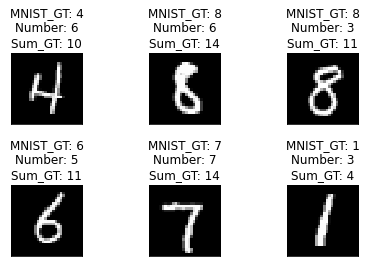

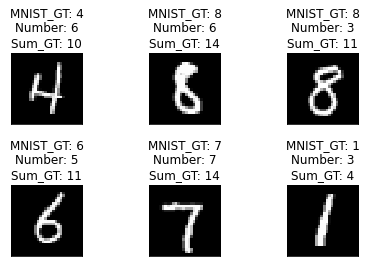

In [10]:
fig = plt.figure()

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(data_batch['input_mnist_image'][i].squeeze(0), cmap='gray', interpolation='none')
  plt.title(f"MNIST_GT: {data_batch['mnist_gt'][i]}\nNumber: {data_batch['input_number'][i]}\nSum_GT: {data_batch['sum_gt'][i]}")
  plt.xticks([])
  plt.yticks([])

fig

Our network

In [11]:
from model.network import Network
net = Network ()

In [12]:
print(net)

Network(
  (Conv3_1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (Conv3_2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (Conv3_3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (Conv1_1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
  (Conv3_4): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
  (Conv3_5): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (Conv3_6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (Conv1_2): Conv2d(32, 10, kernel_size=(1, 1), stride=(1, 1))
  (Fc_1): Linear(in_features=20, out_features=32, bias=True)
  (Fc_2): Linear(in_features=32, out_features=19, bias=True)
)


Training the model

In [13]:
from model.trainer import TrainModel

In [14]:
loss_criterion = nn.CrossEntropyLoss ()
TrainModel (net, train_loader, valid_loader, loss_criterion, 10, 0.01, device)

-------------- Epoch 1 --------------
Training: (MNIST Digit: Loss = 1.063146, Acc = 63.12%)	(Digit Sum: Loss = 2.059242, Acc = 29.11%)
Validation:  (MNIST Digit: Loss = 0.293092, Acc = 90.71%)	(Digit Sum: Loss = 1.388979, Acc = 52.05%)
-------------- Epoch 2 --------------
Training: (MNIST Digit: Loss = 0.225555, Acc = 93.07%)	(Digit Sum: Loss = 0.920908, Acc = 73.25%)
Validation:  (MNIST Digit: Loss = 0.149235, Acc = 95.60%)	(Digit Sum: Loss = 0.596736, Acc = 84.46%)
-------------- Epoch 3 --------------
Training: (MNIST Digit: Loss = 0.128157, Acc = 96.10%)	(Digit Sum: Loss = 0.391302, Acc = 90.99%)
Validation:  (MNIST Digit: Loss = 0.113367, Acc = 96.39%)	(Digit Sum: Loss = 0.289838, Acc = 93.02%)
-------------- Epoch 4 --------------
Training: (MNIST Digit: Loss = 0.096888, Acc = 97.06%)	(Digit Sum: Loss = 0.233130, Acc = 94.34%)
Validation:  (MNIST Digit: Loss = 0.097041, Acc = 96.83%)	(Digit Sum: Loss = 0.195404, Acc = 95.24%)
-------------- Epoch 5 --------------
Training: (MNI